In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import LambdaCallback, ModelCheckpoint
import h5py
import random

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
mnist_images_train = mnist.train.images
mnist_labels_train = mnist.train.labels
mnist_images_test = mnist.test.images
mnist_labels_test = mnist.test.labels

In [3]:
digits = 10
Y_train = []
Y_test = []
Y_train = np.eye(digits)[mnist_labels_train.astype('int32')]
Y_test = np.eye(digits)[mnist_labels_test.astype('int32')]

In [4]:
X_train = mnist_images_train.reshape(mnist_images_train.shape[0], 28, 28, 1)
X_test = mnist_images_test.reshape(mnist_images_test.shape[0], 28, 28, 1)

In [5]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=[28, 28, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
mc = ModelCheckpoint('weights{epoch:02d}.h5', save_weights_only=True, period=1)

In [7]:
batch_size = 64
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test), callbacks = [mc])
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 12s 225us/sample - loss: 2.2244 - acc: 0.2786 - val_loss: 2.1356 - val_acc: 0.4467
Epoch 2/10
55000/55000 [==============================] - 12s 219us/sample - loss: 2.0578 - acc: 0.5079 - val_loss: 1.9598 - val_acc: 0.6189
Epoch 3/10
55000/55000 [==============================] - 12s 220us/sample - loss: 1.8816 - acc: 0.6229 - val_loss: 1.7723 - val_acc: 0.7042
Epoch 4/10
55000/55000 [==============================] - 13s 227us/sample - loss: 1.7019 - acc: 0.6841 - val_loss: 1.5848 - val_acc: 0.7617
Epoch 5/10
55000/55000 [==============================] - 13s 235us/sample - loss: 1.5241 - acc: 0.7275 - val_loss: 1.4030 - val_acc: 0.7960
Epoch 6/10
55000/55000 [==============================] - 13s 236us/sample - loss: 1.3582 - acc: 0.7514 - val_loss: 1.2399 - val_acc: 0.8145
Epoch 7/10
55000/55000 [==============================] - 13s 238us/sample - loss: 1.2132 - acc: 0.7731 

In [8]:
f=open("training_predictions.txt","w")
model.load_weights('weights01.h5')
for x in model.predict_classes(X_train):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights02.h5')
for x in model.predict_classes(X_train):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights03.h5')
for x in model.predict_classes(X_train):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights04.h5')
for x in model.predict_classes(X_train):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights05.h5')
for x in model.predict_classes(X_train):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights06.h5')
for x in model.predict_classes(X_train):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights07.h5')
for x in model.predict_classes(X_train):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights08.h5')
for x in model.predict_classes(X_train):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights09.h5')
for x in model.predict_classes(X_train):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights10.h5')
for x in model.predict_classes(X_train):
    f.write(str(x)+" ")
f.write("\n")
f.close()

In [9]:
# m1 = int(0.05*784)
# m2 = int(0.1*784)
# m3 = int(0.15*784)
# m4 = int(0.2*784)
# m5 = int(0.25*784)

# randomlist_m1 = np.sort(random.sample(range(0, 784), m1))
# randomlist_m2 = np.sort(random.sample(range(0, 784), m2))
# randomlist_m3 = np.sort(random.sample(range(0, 784), m3))
# randomlist_m4 = np.sort(random.sample(range(0, 784), m4))
# randomlist_m5 = np.sort(random.sample(range(0, 784), m5))

In [38]:
# f = open("random_list.txt","w")
# for x in randomlist_m1:
#     f.write(str(x)+" ")
# f.write("\n")
# for x in randomlist_m2:
#     f.write(str(x)+" ")
# f.write("\n")
# for x in randomlist_m3:
#     f.write(str(x) + " ")
# f.write("\n")
# for x in randomlist_m4:
#     f.write(str(x) + " ")
# f.write("\n")
# for x in randomlist_m5:
#     f.write(str(x) + " ")
# f.write("\n")

1

In [52]:
f = open("random_list.txt","r")
random_numbers = f.readlines()
randomlist_m1 = random_numbers[0].split(" ")
randomlist_m1.remove("\n")
randomlist_m1 = [int(x) for x in randomlist_m1]
randomlist_m2 = random_numbers[1].split(" ")
randomlist_m2.remove("\n")
randomlist_m2 = [int(x) for x in randomlist_m2]
randomlist_m3 = random_numbers[2].split(" ")
randomlist_m3.remove("\n")
randomlist_m3 = [int(x) for x in randomlist_m3]
randomlist_m4 = random_numbers[3].split(" ")
randomlist_m4.remove("\n")
randomlist_m4 = [int(x) for x in randomlist_m4]
randomlist_m5 = random_numbers[4].split(" ")
randomlist_m5.remove("\n")
randomlist_m5 = [int(x) for x in randomlist_m5]


In [10]:
X_train_new_1 = X_train.reshape(X_train.shape[0], 1 , 784, 1).copy()
for sample in X_train_new_1:
    for t in randomlist_m1:
        sample[0][t] = 1-sample[0][t]
X_train_new_2 = X_train.reshape(X_train.shape[0], 1 , 784, 1).copy()
for sample in X_train_new_2:
    for t in randomlist_m2:
        sample[0][t] = 1-sample[0][t]
X_train_new_3 = X_train.reshape(X_train.shape[0], 1 , 784, 1).copy()
for sample in X_train_new_3:
    for t in randomlist_m3:
        sample[0][t] = 1-sample[0][t]
X_train_new_4 = X_train.reshape(X_train.shape[0], 1 , 784, 1).copy()
for sample in X_train_new_4:
    for t in randomlist_m4:
        sample[0][t] = 1-sample[0][t]
X_train_new_5 = X_train.reshape(X_train.shape[0], 1 , 784, 1).copy()
for sample in X_train_new_5:
    for t in randomlist_m5:
        sample[0][t] = 1-sample[0][t]

In [11]:
X_train_m1 = X_train_new_1.reshape(X_train.shape[0], 28, 28, 1).copy()
X_train_m2 = X_train_new_2.reshape(X_train.shape[0], 28, 28, 1).copy()
X_train_m3 = X_train_new_3.reshape(X_train.shape[0], 28, 28, 1).copy()
X_train_m4 = X_train_new_4.reshape(X_train.shape[0], 28, 28, 1).copy()
X_train_m5 = X_train_new_5.reshape(X_train.shape[0], 28, 28, 1).copy()

In [12]:
f=open("training_predictions_m1.txt","w")
model.load_weights('weights01.h5')
for x in model.predict_classes(X_train_m1):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights02.h5')
for x in model.predict_classes(X_train_m1):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights03.h5')
for x in model.predict_classes(X_train_m1):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights04.h5')
for x in model.predict_classes(X_train_m1):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights05.h5')
for x in model.predict_classes(X_train_m1):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights06.h5')
for x in model.predict_classes(X_train_m1):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights07.h5')
for x in model.predict_classes(X_train_m1):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights08.h5')
for x in model.predict_classes(X_train_m1):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights09.h5')
for x in model.predict_classes(X_train_m1):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights10.h5')
for x in model.predict_classes(X_train_m1):
    f.write(str(x)+" ")
f.write("\n")

1

In [13]:
f=open("training_predictions_m2.txt","w")
model.load_weights('weights01.h5')
for x in model.predict_classes(X_train_m2):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights02.h5')
for x in model.predict_classes(X_train_m2):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights03.h5')
for x in model.predict_classes(X_train_m2):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights04.h5')
for x in model.predict_classes(X_train_m2):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights05.h5')
for x in model.predict_classes(X_train_m2):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights06.h5')
for x in model.predict_classes(X_train_m2):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights07.h5')
for x in model.predict_classes(X_train_m2):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights08.h5')
for x in model.predict_classes(X_train_m2):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights09.h5')
for x in model.predict_classes(X_train_m2):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights10.h5')
for x in model.predict_classes(X_train_m2):
    f.write(str(x)+" ")
f.write("\n")

1

In [14]:
f=open("training_predictions_m3.txt","w")
model.load_weights('weights01.h5')
for x in model.predict_classes(X_train_m3):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights02.h5')
for x in model.predict_classes(X_train_m3):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights03.h5')
for x in model.predict_classes(X_train_m3):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights04.h5')
for x in model.predict_classes(X_train_m3):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights05.h5')
for x in model.predict_classes(X_train_m3):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights06.h5')
for x in model.predict_classes(X_train_m3):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights07.h5')
for x in model.predict_classes(X_train_m3):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights08.h5')
for x in model.predict_classes(X_train_m3):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights09.h5')
for x in model.predict_classes(X_train_m3):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights10.h5')
for x in model.predict_classes(X_train_m3):
    f.write(str(x)+" ")
f.write("\n")

1

In [15]:
f=open("training_predictions_m4.txt","w")
model.load_weights('weights01.h5')
for x in model.predict_classes(X_train_m4):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights02.h5')
for x in model.predict_classes(X_train_m4):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights03.h5')
for x in model.predict_classes(X_train_m4):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights04.h5')
for x in model.predict_classes(X_train_m4):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights05.h5')
for x in model.predict_classes(X_train_m4):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights06.h5')
for x in model.predict_classes(X_train_m4):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights07.h5')
for x in model.predict_classes(X_train_m4):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights08.h5')
for x in model.predict_classes(X_train_m4):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights09.h5')
for x in model.predict_classes(X_train_m4):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights10.h5')
for x in model.predict_classes(X_train_m4):
    f.write(str(x)+" ")
f.write("\n")

1

In [16]:
f=open("training_predictions_m5.txt","w")
model.load_weights('weights01.h5')
for x in model.predict_classes(X_train_m5):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights02.h5')
for x in model.predict_classes(X_train_m5):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights03.h5')
for x in model.predict_classes(X_train_m5):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights04.h5')
for x in model.predict_classes(X_train_m5):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights05.h5')
for x in model.predict_classes(X_train_m5):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights06.h5')
for x in model.predict_classes(X_train_m5):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights07.h5')
for x in model.predict_classes(X_train_m5):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights08.h5')
for x in model.predict_classes(X_train_m5):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights09.h5')
for x in model.predict_classes(X_train_m5):
    f.write(str(x)+" ")
f.write("\n")
model.load_weights('weights10.h5')
for x in model.predict_classes(X_train_m5):
    f.write(str(x)+" ")
f.write("\n")

1

In [82]:
f = open("training_predictions.txt","r")
predictions_orig = f.readlines()
print(np.asarray(predictions_orig)[0][:100])
print(np.asarray(predictions_orig)[1][:100])
print(np.asarray(predictions_orig)[2][:100])
print(np.asarray(predictions_orig)[3][:100])
print(np.asarray(predictions_orig)[4][:100])
print(np.asarray(predictions_orig)[5][:100])
print(np.asarray(predictions_orig)[6][:100])
print(np.asarray(predictions_orig)[7][:100])
print(np.asarray(predictions_orig)[8][:100])
print(np.asarray(predictions_orig)[9][:100])

2 0 4 6 1 4 1 0 6 0 0 3 1 0 6 0 2 0 6 0 1 6 5 1 6 4 6 4 4 0 4 0 4 4 0 7 3 4 4 6 6 0 6 0 4 0 0 4 0 0 
2 3 4 6 1 8 1 0 4 0 0 3 1 0 7 0 2 0 6 0 1 6 1 1 4 7 6 4 4 0 1 3 4 4 0 7 3 1 4 6 6 3 6 8 4 0 4 4 0 0 
2 3 4 6 1 8 1 0 4 8 0 3 1 0 7 0 2 9 6 0 1 6 1 1 4 7 6 5 3 0 1 3 4 4 8 7 3 1 4 6 6 3 6 8 4 0 4 4 0 0 
2 3 9 6 1 8 1 0 9 8 0 3 1 0 7 0 2 9 6 0 1 6 1 1 4 7 6 5 3 0 1 3 4 4 8 7 3 1 4 6 6 3 6 8 4 0 4 4 0 0 
7 3 9 6 1 8 1 0 9 8 0 3 1 0 7 0 2 9 6 0 1 6 1 1 4 7 6 5 3 0 1 3 4 4 8 7 3 1 4 6 6 3 6 8 4 0 9 4 0 7 
7 3 9 6 1 8 1 0 9 8 0 3 1 0 7 0 2 9 6 0 1 6 1 1 4 7 6 5 5 8 1 3 4 4 8 7 3 1 4 6 6 3 6 8 4 0 9 4 0 7 
7 3 9 6 1 8 1 0 9 8 0 3 1 0 7 0 2 9 6 0 1 6 1 1 9 7 6 5 5 8 1 3 4 4 8 7 3 1 4 6 6 3 6 8 4 0 9 4 0 7 
7 3 9 6 1 8 1 0 9 8 0 3 1 0 7 0 2 9 6 0 1 6 1 1 9 7 6 5 5 8 1 3 4 4 8 7 3 1 4 6 6 3 3 8 9 0 9 4 0 7 
7 3 9 6 1 8 1 0 9 8 0 3 1 0 7 0 2 9 6 0 1 6 1 1 9 7 6 5 5 8 1 3 4 4 8 7 3 1 4 6 6 3 3 8 9 0 9 4 0 7 
7 3 9 6 1 8 1 0 9 8 0 3 1 0 7 0 2 9 6 0 1 6 1 1 9 7 6 5 5 8 8 3 4 4 8 7 3 1 4 6 6 3 3 8 9 0

In [83]:
labels_preds = []
temp = ''
for idx, line in enumerate(predictions_orig):
    temp = line.split(" ")
    temp.remove("\n")
    temp = [int(t) for t in temp]
    if idx==0:
        labels_preds = temp
    else:
        labels_preds = np.vstack((labels_preds, temp))
print(labels_preds.shape)

(10, 55000)


In [84]:
f = open("training_predictions_m1.txt","r")
predictions_m1 = f.readlines()
print(np.asarray(predictions_m1)[0][:100])
print(np.asarray(predictions_m1)[1][:100])
print(np.asarray(predictions_m1)[2][:100])
print(np.asarray(predictions_m1)[3][:100])
print(np.asarray(predictions_m1)[4][:100])
print(np.asarray(predictions_m1)[5][:100])
print(np.asarray(predictions_m1)[6][:100])
print(np.asarray(predictions_m1)[7][:100])
print(np.asarray(predictions_m1)[8][:100])
print(np.asarray(predictions_m1)[9][:100])

2 0 6 0 3 4 3 0 0 6 0 0 5 0 5 0 0 0 0 0 5 6 8 3 6 4 6 0 4 4 3 0 4 4 5 7 6 4 4 0 6 8 6 6 4 0 6 0 0 0 
2 3 4 6 3 8 3 0 0 0 0 3 5 0 7 0 2 0 0 0 5 6 8 3 6 7 6 0 0 0 8 3 4 4 8 7 3 6 4 0 6 3 6 8 4 0 0 4 0 0 
2 3 4 6 1 8 1 0 4 8 0 3 1 0 7 0 2 0 6 0 5 6 8 1 4 7 6 5 5 0 8 3 4 4 8 7 3 6 4 6 6 3 3 8 4 0 0 4 0 0 
2 3 4 6 1 8 1 0 4 8 0 3 1 0 7 0 2 9 6 0 5 6 7 1 4 7 6 5 5 8 8 3 4 4 8 7 3 6 4 6 6 3 3 8 4 0 4 4 0 0 
7 3 4 6 1 8 1 0 4 8 0 3 1 0 7 0 2 9 6 0 5 6 7 1 5 7 6 5 5 8 8 3 4 4 8 7 3 6 4 6 6 3 3 8 4 0 4 4 0 0 
7 3 4 6 1 8 1 0 9 8 0 3 1 0 7 0 2 9 6 0 5 6 7 1 5 7 6 5 5 8 8 3 4 4 8 7 3 6 4 6 6 3 5 8 4 0 4 4 0 7 
7 3 9 6 1 8 1 0 9 8 0 3 1 0 7 0 2 9 6 0 5 6 7 1 5 7 6 5 5 8 8 3 4 4 8 7 3 6 4 6 6 3 5 8 4 0 4 4 0 7 
7 3 9 6 1 8 1 0 9 8 0 3 1 0 7 0 2 9 6 0 8 6 7 1 5 7 6 5 5 8 8 3 4 4 8 7 3 8 4 6 6 3 5 8 4 0 4 4 0 7 
7 3 9 6 1 8 1 0 9 8 0 3 1 5 7 0 2 9 6 0 8 6 7 1 5 7 6 5 5 8 8 3 4 4 8 7 3 6 4 6 6 3 5 8 9 0 4 4 0 7 
7 3 9 6 1 8 1 0 9 8 0 3 1 5 7 0 2 9 6 0 8 6 7 1 5 7 6 5 5 8 8 3 4 4 8 7 3 6 4 6 6 3 5 8 9 0

In [85]:
labels_preds_m1 = []
temp=''
for idx, line in enumerate(predictions_m1):
    temp = line.split(" ")
    temp.remove("\n")
    temp = [int(t) for t in temp]
    if idx==0:
        labels_preds_m1 = temp
    else:
        labels_preds_m1 = np.vstack((labels_preds_m1, temp))
print(labels_preds_m1.shape)

(10, 55000)


In [86]:
print(labels_preds_m1[:,2])
print(labels_preds[:,2])

[6 4 4 4 4 4 9 9 9 9]
[4 4 4 9 9 9 9 9 9 9]


In [132]:
orig_m1 = []
for t in range(labels_preds_m1.shape[1]):
    count=0
    for s in range(labels_preds.shape[0]):
        if labels_preds[s][t]==labels_preds_m1[s][t]:
             count+=1
    count = float(count/10)
    orig_m1.append(count)
    

count_1 = [i for i in range(len(orig_m1)) if orig_m1[i] == 1]
count_2 = [i for i in range(len(orig_m1)) if orig_m1[i] == 0.9]
count_3 = [i for i in range(len(orig_m1)) if orig_m1[i] == 0.8]
count_4 = [i for i in range(len(orig_m1)) if orig_m1[i] == 0.7]
count_5 = [i for i in range(len(orig_m1)) if orig_m1[i] == 0.6]
count_6 = [i for i in range(len(orig_m1)) if orig_m1[i] == 0.5]
count_7 = [i for i in range(len(orig_m1)) if orig_m1[i] == 0.4]
count_8 = [i for i in range(len(orig_m1)) if orig_m1[i] == 0.3]
count_9 = [i for i in range(len(orig_m1)) if orig_m1[i] == 0.2]
count_10 = [i for i in range(len(orig_m1)) if orig_m1[i] == 0.1]
count_11 = [i for i in range(len(orig_m1)) if orig_m1[i] == 0.0]
arr = []
arr.extend(count_1[:1])
arr.extend(count_2[:1])
arr.extend(count_3[:1])
arr.extend(count_4[:1])
arr.extend(count_5[:1])
arr.extend(count_6[:1])
arr.extend(count_7[:1])
arr.extend(count_8[:1])
arr.extend(count_9[:1])
arr.extend(count_10[:1])
arr.extend(count_11[:1])

In [30]:
f = open("training_predictions_m2.txt","r")
predictions = f.readlines()
print(np.asarray(predictions)[0][:100])
print(np.asarray(predictions)[1][:100])
print(np.asarray(predictions)[2][:100])
print(np.asarray(predictions)[3][:100])
print(np.asarray(predictions)[4][:100])
print(np.asarray(predictions)[5][:100])
print(np.asarray(predictions)[6][:100])
print(np.asarray(predictions)[7][:100])
print(np.asarray(predictions)[8][:100])
print(np.asarray(predictions)[9][:100])

2 0 0 6 3 0 3 0 0 0 0 0 3 0 2 0 2 0 0 0 6 6 2 3 6 3 6 3 0 0 3 0 2 3 0 2 0 0 2 0 6 0 6 0 2 0 0 0 0 0 
2 3 0 6 3 0 3 0 0 0 0 3 3 0 2 0 2 0 6 0 3 6 2 3 6 7 6 3 3 0 3 0 2 0 0 2 3 6 7 0 6 0 6 0 0 0 0 0 0 0 
2 3 0 6 3 0 3 0 0 3 0 3 3 0 2 0 2 0 6 0 3 6 2 3 6 7 6 3 3 0 3 3 3 7 0 2 3 6 7 6 6 0 6 0 7 0 0 0 0 0 
2 3 0 6 3 8 3 0 0 3 0 3 3 0 2 0 2 0 6 0 3 6 7 3 2 7 6 3 3 0 3 3 3 4 8 7 3 6 7 6 6 3 3 0 7 0 0 0 0 0 
2 3 0 6 3 8 1 0 2 3 0 3 3 0 2 0 2 7 6 0 2 6 7 1 2 7 6 3 3 0 3 3 3 4 8 7 3 6 7 6 6 3 3 8 7 0 0 2 0 0 
2 3 9 6 1 8 1 0 2 3 0 3 3 0 2 0 2 7 6 0 2 6 7 1 2 7 6 5 3 0 3 3 3 4 8 7 3 6 7 6 6 3 3 8 7 0 0 2 0 0 
2 3 9 6 1 8 1 0 2 3 0 3 3 0 2 0 2 7 6 0 2 6 7 1 2 7 6 5 3 0 3 3 3 9 8 7 3 2 7 6 6 3 3 8 7 0 0 4 0 7 
2 3 9 6 1 8 1 0 9 3 0 3 1 0 2 0 2 7 6 0 2 6 7 1 2 7 6 5 3 0 3 3 3 9 8 7 3 2 7 6 6 3 3 8 7 0 0 4 0 7 
2 3 9 6 1 8 1 0 9 3 0 3 3 0 2 0 2 7 6 0 2 6 7 1 2 7 6 5 5 0 3 3 3 9 8 7 3 2 7 6 6 3 3 8 7 0 0 4 0 7 
2 3 9 6 1 8 1 0 9 3 0 3 1 3 2 0 2 7 6 0 2 6 7 1 2 7 6 5 5 5 3 3 3 9 8 7 3 2 7 6 6 3 3 8 7 0

In [20]:
f = open("training_predictions_m3.txt","r")
predictions = f.readlines()
print(np.asarray(predictions)[0][:100])
print(np.asarray(predictions)[1][:100])
print(np.asarray(predictions)[2][:100])
print(np.asarray(predictions)[3][:100])
print(np.asarray(predictions)[4][:100])
print(np.asarray(predictions)[5][:100])
print(np.asarray(predictions)[6][:100])
print(np.asarray(predictions)[7][:100])
print(np.asarray(predictions)[8][:100])
print(np.asarray(predictions)[9][:100])

0 0 4 6 6 0 6 0 6 4 0 0 6 0 0 0 6 0 2 0 6 6 6 6 6 4 6 6 4 0 6 0 6 4 0 2 0 0 4 6 6 0 6 0 2 0 6 4 0 0 
0 0 4 6 6 0 6 0 6 0 0 0 6 0 0 0 6 0 6 0 6 6 6 6 6 4 6 3 3 0 6 0 3 4 0 2 3 0 4 6 6 0 6 0 0 0 6 4 0 0 
0 3 4 6 6 0 6 0 4 0 0 3 6 0 4 0 6 2 6 0 6 6 6 6 6 4 6 3 3 0 8 3 3 4 0 2 3 6 4 6 6 0 6 0 0 0 4 4 0 0 
2 3 4 6 6 0 6 0 4 3 0 3 6 0 4 0 2 4 6 0 6 6 6 6 4 4 6 3 3 0 8 3 3 4 0 7 3 6 4 6 6 3 6 8 7 0 4 4 0 0 
2 3 4 6 6 0 6 0 4 3 0 3 6 0 2 0 2 4 6 0 6 6 6 6 4 4 6 3 3 0 8 3 3 4 2 7 3 6 4 6 6 3 6 8 7 0 4 4 0 0 
2 3 4 6 6 0 6 0 4 3 0 3 6 0 2 0 2 4 6 0 6 6 2 6 4 7 6 5 3 0 8 3 3 4 2 7 3 6 4 6 6 3 6 8 7 0 4 4 0 0 
2 3 4 6 6 8 1 0 4 3 0 3 6 0 2 0 2 4 6 0 6 6 2 6 4 7 6 5 3 0 8 3 3 4 2 7 3 6 4 6 6 3 6 8 7 0 4 4 0 0 
2 3 4 6 6 8 1 0 4 8 0 3 6 0 4 0 2 4 6 0 6 6 2 1 4 7 6 5 3 0 8 3 3 4 8 7 3 6 4 6 6 3 6 8 7 0 4 4 0 7 
2 3 4 6 6 8 1 0 4 8 0 3 6 0 4 0 2 4 6 0 6 6 2 1 5 7 6 5 3 0 8 3 3 4 8 7 3 6 4 6 6 3 6 8 7 0 4 4 0 7 
2 3 4 6 6 8 1 0 4 8 0 3 6 0 2 0 2 4 6 0 6 6 2 1 5 7 6 5 3 5 8 3 3 8 8 7 3 6 4 6 6 3 6 8 7 0

In [21]:
f = open("training_predictions_m4.txt","r")
predictions = f.readlines()
print(np.asarray(predictions)[0][:100])
print(np.asarray(predictions)[1][:100])
print(np.asarray(predictions)[2][:100])
print(np.asarray(predictions)[3][:100])
print(np.asarray(predictions)[4][:100])
print(np.asarray(predictions)[5][:100])
print(np.asarray(predictions)[6][:100])
print(np.asarray(predictions)[7][:100])
print(np.asarray(predictions)[8][:100])
print(np.asarray(predictions)[9][:100])

2 6 6 6 6 2 6 0 6 0 0 6 6 0 2 0 2 6 6 0 6 6 6 6 6 4 6 8 6 4 6 0 4 8 0 2 6 6 4 6 6 0 6 6 0 6 4 2 0 0 
2 0 4 6 6 2 6 0 4 0 0 3 8 0 7 0 2 0 6 0 6 6 6 6 4 4 6 0 0 0 2 0 2 8 0 2 0 6 4 6 6 0 6 0 0 6 4 2 0 0 
2 0 4 6 2 2 2 0 2 2 0 3 2 0 7 0 2 2 6 0 6 6 7 2 4 7 6 0 0 0 2 0 2 8 0 2 2 6 4 6 6 0 6 0 0 0 2 2 0 0 
2 3 4 6 2 2 2 0 2 2 0 3 2 0 7 0 2 2 6 0 2 6 7 2 2 7 6 5 5 0 2 3 2 8 0 2 3 6 4 6 6 2 6 2 0 0 2 2 0 0 
2 3 4 6 2 2 2 0 2 2 0 3 2 0 7 0 2 2 6 0 2 6 7 2 2 7 6 5 5 5 2 3 2 8 2 2 3 2 4 6 6 3 6 2 7 0 2 2 0 0 
2 3 4 6 2 2 2 0 2 2 0 3 2 0 7 0 2 2 6 0 2 6 7 2 2 7 6 5 5 5 2 3 2 5 2 2 3 2 4 6 6 3 2 2 7 2 2 2 0 0 
2 3 4 6 2 2 2 0 2 2 0 3 2 2 7 0 2 2 6 0 2 6 7 2 2 7 6 5 5 5 2 3 2 5 2 2 3 2 4 6 6 3 2 2 7 2 2 4 0 0 
2 3 4 6 2 2 2 0 2 2 0 3 2 2 7 0 2 2 6 0 2 6 7 2 2 7 6 5 5 5 2 3 2 5 2 7 3 2 4 6 6 3 2 2 5 2 2 4 0 7 
2 3 4 6 2 5 2 0 2 2 0 3 2 2 7 0 2 2 6 0 2 6 2 2 5 5 6 5 5 5 2 3 2 5 2 7 3 2 4 6 6 3 2 2 5 2 2 4 0 7 
2 3 4 6 2 5 2 0 2 5 0 3 2 2 7 0 2 2 6 0 2 6 2 2 5 5 6 5 5 5 2 3 2 5 2 7 3 2 4 6 6 3 5 5 5 2

In [22]:
f = open("training_predictions_m5.txt","r")
predictions = f.readlines()
print(np.asarray(predictions)[0][:100])
print(np.asarray(predictions)[1][:100])
print(np.asarray(predictions)[2][:100])
print(np.asarray(predictions)[3][:100])
print(np.asarray(predictions)[4][:100])
print(np.asarray(predictions)[5][:100])
print(np.asarray(predictions)[6][:100])
print(np.asarray(predictions)[7][:100])
print(np.asarray(predictions)[8][:100])
print(np.asarray(predictions)[9][:100])

0 0 0 0 6 0 6 0 6 0 0 0 0 0 6 0 6 0 0 0 6 0 6 6 6 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 6 0 6 0 0 0 0 
0 0 0 0 6 0 6 0 0 0 0 0 0 0 6 0 0 0 0 0 6 0 8 6 6 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 3 0 3 0 0 0 0 0 3 0 6 0 2 0 0 0 6 0 8 3 0 0 0 0 0 0 3 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 3 0 3 0 0 0 0 3 2 0 2 0 2 0 0 0 3 0 8 3 0 0 0 0 0 0 3 0 3 0 0 2 3 0 0 0 0 0 0 0 6 0 0 0 0 0 
2 3 0 0 3 0 3 0 2 0 0 3 2 0 2 0 2 0 6 0 2 0 8 2 6 7 0 0 5 0 3 3 3 0 0 2 3 2 2 6 6 0 3 0 6 0 0 4 0 0 
2 3 0 0 2 2 3 0 2 2 0 3 2 0 2 0 2 7 6 0 2 6 7 2 2 7 6 5 5 0 2 3 2 4 0 2 3 2 2 6 6 2 3 8 4 0 0 4 0 0 
2 3 0 6 2 2 3 0 2 2 0 3 2 0 2 0 2 7 6 0 2 6 7 2 2 7 6 5 5 0 2 3 4 4 2 2 3 2 5 6 6 2 3 8 4 0 0 4 0 0 
2 3 5 2 2 5 3 0 2 2 0 3 2 0 2 0 2 7 6 0 2 6 7 2 2 7 6 5 5 0 2 3 4 4 2 2 3 2 5 6 6 2 3 8 4 0 2 4 0 0 
2 3 5 2 2 5 3 0 2 2 0 3 2 0 2 0 2 7 6 0 2 6 7 2 5 7 6 5 5 0 2 3 4 4 2 2 3 2 5 6 6 2 3 8 4 0 2 4 0 0 
2 3 5 2 2 5 3 0 2 2 0 3 2 0 2 0 2 7 6 0 2 6 7 2 5 7 2 5 5 5 2 3 4 4 2 2 3 2 5 6 6 2 5 8 4 0

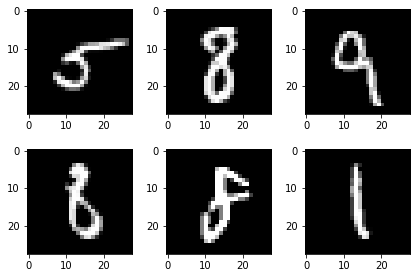

In [140]:
X_train_img = X_train.reshape(X_train.shape[0], 28, 28).copy()
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train_img[arr[i+5]], cmap="gray", interpolation="none")
#     plt.title("Ground Truth: {}".format(X_train_img[i]))
#     plt.xticks([])
#     plt.yticks([])


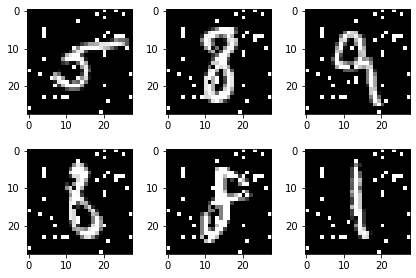

In [141]:
X_train_m1_img = X_train_m1.reshape(X_train_m1.shape[0], 28, 28).copy()
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train_m1_img[arr[i+5]], cmap="gray", interpolation="none")

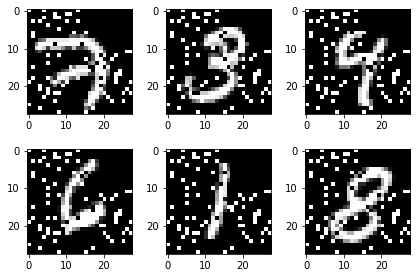

In [25]:
X_train_m2_img = X_train_m2.reshape(X_train_m2.shape[0], 28, 28).copy()
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train_m2_img[i], cmap="gray", interpolation="none")

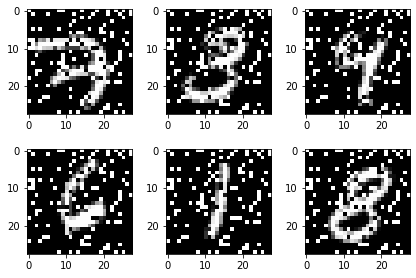

In [26]:
X_train_m3_img = X_train_m3.reshape(X_train_m3.shape[0], 28, 28).copy()
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train_m3_img[i], cmap="gray", interpolation="none")

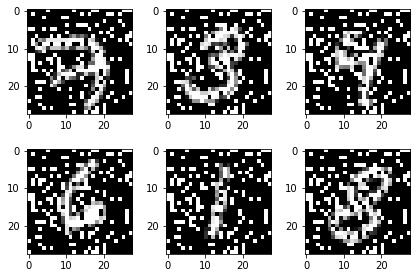

In [27]:
X_train_m4_img = X_train_m4.reshape(X_train_m4.shape[0], 28, 28).copy()
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train_m4_img[i], cmap="gray", interpolation="none")

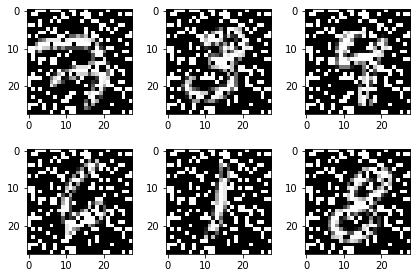

In [28]:
X_train_m5_img = X_train_m5.reshape(X_train_m5.shape[0], 28, 28).copy()
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train_m5_img[i], cmap="gray", interpolation="none")

In [142]:
X_train_ori = X_train.reshape(X_train.shape[0], 1, 784).copy()
X_train_mut1 = X_train_m1.reshape(X_train_m1.shape[0], 1, 784).copy()
for x in arr:
    print(np.dot(X_train_ori[x],X_train_mut1[x].T)/(np.linalg.norm(X_train_ori[x], ord=2)*np.linalg.norm(X_train_mut1[x], ord=2)))
    

[[0.87247413]]
[[0.80287117]]
[[0.6985421]]
[[0.8773979]]
[[0.8244947]]
[[0.7428175]]
[[0.82398844]]
[[0.7491631]]
[[0.77748466]]
[[0.8153055]]
[[0.6681364]]
